In [32]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [33]:
import os
import torch
from fastai import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.metrics import error_rate, accuracy
from fastai.vision import *
from fastai.vision.all import *
import numpy as np
import pandas as pd
import matplotlib as plt
# import fastbook
# from fastbook import *
from fastai.vision.widgets import *
import joblib

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
from PIL import PngImagePlugin

LARGE_ENOUGH_NUMBER = 100
PngImagePlugin.MAX_TEXT_CHUNK = LARGE_ENOUGH_NUMBER * (1024**2)

# Google Image Search Api (SerpApi)

In [36]:
datapath = Path('../input/100riceimagedataset')

In [37]:
bs = 64

In [38]:
fns = get_image_files(datapath)
fns

(#874) [Path('../input/100riceimagedataset/basmati/350489b7-1a1a-4140-a049-829733fec42d.jpg'),Path('../input/100riceimagedataset/basmati/3d416ef1-c1ce-40e7-8eb7-42847c676344.jpg'),Path('../input/100riceimagedataset/basmati/fb199784-0949-432f-9669-be184dd88564.jpg'),Path('../input/100riceimagedataset/basmati/1943bdd0-a3be-4b34-a9ba-0f1c300f6065.jpg'),Path('../input/100riceimagedataset/basmati/4d2c611b-0712-47c7-9739-d69532d7a97c.jpg'),Path('../input/100riceimagedataset/basmati/b29297df-0777-4ae2-a8c1-0e4ee0157cdc.jpg'),Path('../input/100riceimagedataset/basmati/ee52403d-a763-424e-b4b1-e1fbd9b5a821.jpg'),Path('../input/100riceimagedataset/basmati/7d626575-faa3-4d00-a9c7-517be59db9be.jpg'),Path('../input/100riceimagedataset/basmati/2683dcf0-f523-4086-be97-e0146d59c0d3.jpg'),Path('../input/100riceimagedataset/basmati/13f48acf-d63e-41fe-9e64-9de0e7d99a1b.jpg')...]

In [39]:
failed = verify_images(fns)
failed

(#0) []

In [40]:
dls = ImageDataLoaders.from_folder(datapath, valid_pct=0.2,
                                   item_tfms=RandomResizedCrop(224, min_scale=.5),
                                   batch_tfms=aug_transforms(),
                                   bs=bs
                                  )

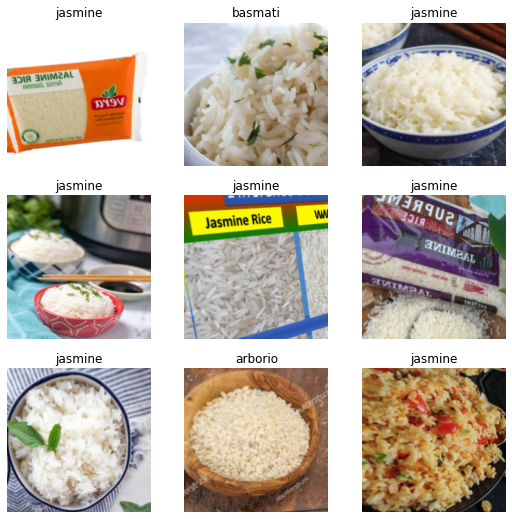

In [41]:
dls.show_batch()

In [42]:
learn = vision_learner(dls, resnet152, model_dir="/tmp/model/", metrics=[accuracy, error_rate])

In [43]:
learn2 = vision_learner(dls, resnet152, model_dir="/tmp/model/", metrics=[accuracy, error_rate])

SuggestedLRs(valley=0.0006918309954926372)

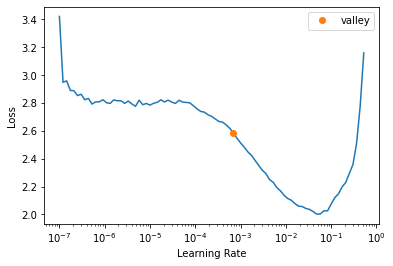

In [44]:
learn.lr_find()

In [45]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.430112,1.651532,0.522988,0.477012,00:51
1,1.969137,1.657033,0.517241,0.482759,00:50
2,1.616680,1.468641,0.568965,0.431034,00:51


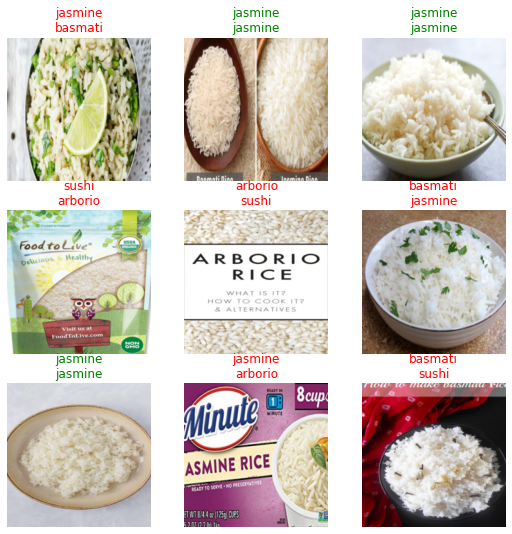

In [46]:
learn.show_results()

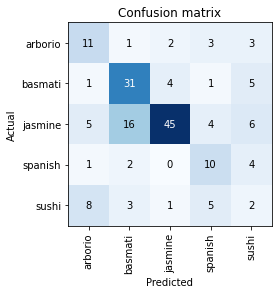

In [47]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

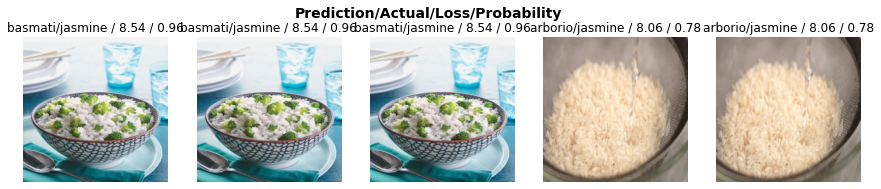

In [48]:
# interp.plot_top_losses(10, figsize=(15,10))
interp.plot_top_losses(5, nrows=1)

In [3]:
learn2.fine_tune(4)

NameError: name 'learn2' is not defined

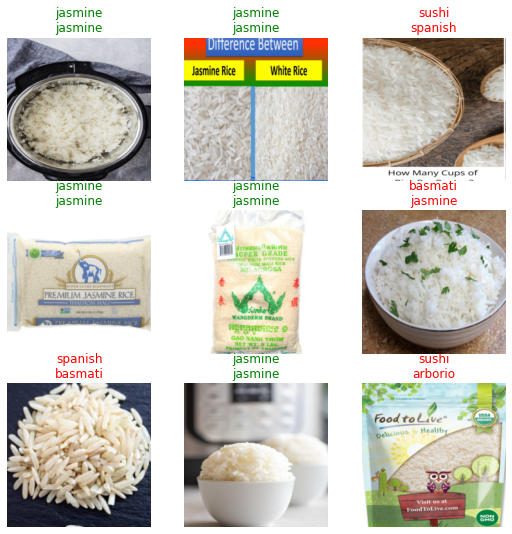

In [50]:
learn2.show_results()

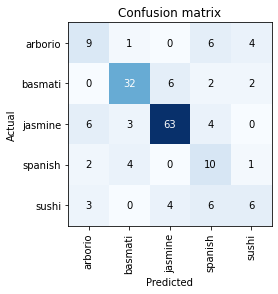

In [51]:
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix()

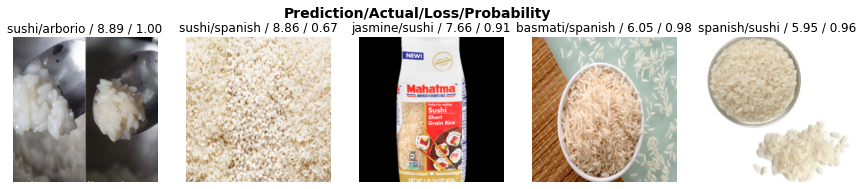

In [52]:
interp2.plot_top_losses(5, nrows=1)

In [53]:
joblib.dump(learn2, './trained_learner.pkl')

['./trained_learner.pkl']

In [59]:
cleaner = ImageClassifierCleaner(learn2)
cleaner

ValueError: not enough values to unpack (expected 4, got 3)